In [1]:
import graph_tool.all as gt
import numpy as np

In [38]:
for i in range(10):
    x = np.random.randint(10, size=7)
    print(x)

[1 8 1 8 6 2 6]
[1 6 8 9 2 9 3]
[4 9 4 5 3 1 9]
[5 9 8 9 5 2 0]
[7 1 0 0 1 2 2]
[9 6 3 1 0 0 1]
[7 8 8 7 3 4 0]
[1 9 5 6 7 7 5]
[0 9 3 1 4 3 7]
[8 8 7 0 3 0 3]


In [37]:
print(x)

[2 6 9 1 1 6 5]


In [146]:
def sample_k(): #Sample to generate the In and Out Degree of each node in the graph. 
    inOutDegree = np.random.randint(maxNodeDegree, size=2)
    if (inOutDegree[0] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[0] = 1
    if (inOutDegree[1] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[1] = 1
    return inOutDegree

In [150]:
def graphGenerator(nodes_size, delayRange=None, simpleDelayArray=True, seed=None):
    
    if(simpleDelayArray): #If it's true, the propagation delay array d(v) will be the index of the node. e.g d(0) = 0; d(4) = 4
        
        
        if(seed!= None): #In order to make our data reproducible, we put a certain seed. 
            
            gt.seed_rng(seed)

            np.random.seed(seed)
        
        mnd = maxNodeDegree
        
        g = gt.random_graph(nodes_size, sample_k)
        edge_weight = g.new_edge_property("double")
        g.edge_properties["weight"] = edge_weight
        
        for edge in g.edges():
            g.ep.weight[edge] = np.random.randint(3, size=1)[0] 

        cap = g.new_vertex_property("int")
        g.vertex_properties["cap"] = cap 

        for vertex in g.vertices(): #Simple propagation delay creation. 
            g.vp.cap[vertex] = int(vertex)
        
        for c in gt.all_circuits(g):
            print(c)
            pathSum = 0
            for item in range(len(c)-1):
                pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
                print(pathSum)
                #Final edge sum: (edge(initial node of the cycle,last node before initial node))
            pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
            if(pathSum == 0):
                print("Cycle with Zero weight detected!")
            else:
                print("Path SUM: %s" % (pathSum))
    
    gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight)
    return g
    
    #delayArray = np.random.randint(delayRange, size=nodes_size)

[0 4 2 6 9 3 5 7 1]
1.0
3.0
3.0
4.0
5.0
6.0
7.0
9.0
Path SUM: 10.0
[0 4 3 5 7 1]
1.0
2.0
3.0
4.0
6.0
Path SUM: 7.0
[0 4 9 3 5 7 1]
1.0
2.0
3.0
4.0
5.0
7.0
Path SUM: 8.0
[1 6 9 3 5 7]
2.0
3.0
4.0
5.0
6.0
Path SUM: 8.0
[1 4 2 6 9 3 5 7]
1.0
3.0
3.0
4.0
5.0
6.0
7.0
Path SUM: 9.0
[1 4 3 5 7]
1.0
2.0
3.0
4.0
Path SUM: 6.0
[1 4 9 3 5 7]
1.0
2.0
3.0
4.0
5.0
Path SUM: 7.0
[2 6 9 3]
0.0
1.0
2.0
Path SUM: 3.0
[2 6 9 3 5 8]
0.0
1.0
2.0
3.0
3.0
Path SUM: 5.0
[2 6 9 3 5 8 4]
0.0
1.0
2.0
3.0
3.0
3.0
Path SUM: 5.0
[3 5]
1.0
Path SUM: 2.0
[3 5 7 9]
1.0
2.0
2.0
Path SUM: 3.0
[3 5 8 4]
1.0
1.0
1.0
Path SUM: 2.0
[3 5 8 4 9]
1.0
1.0
1.0
2.0
Path SUM: 3.0
[3 6 9]
1.0
2.0
Path SUM: 3.0


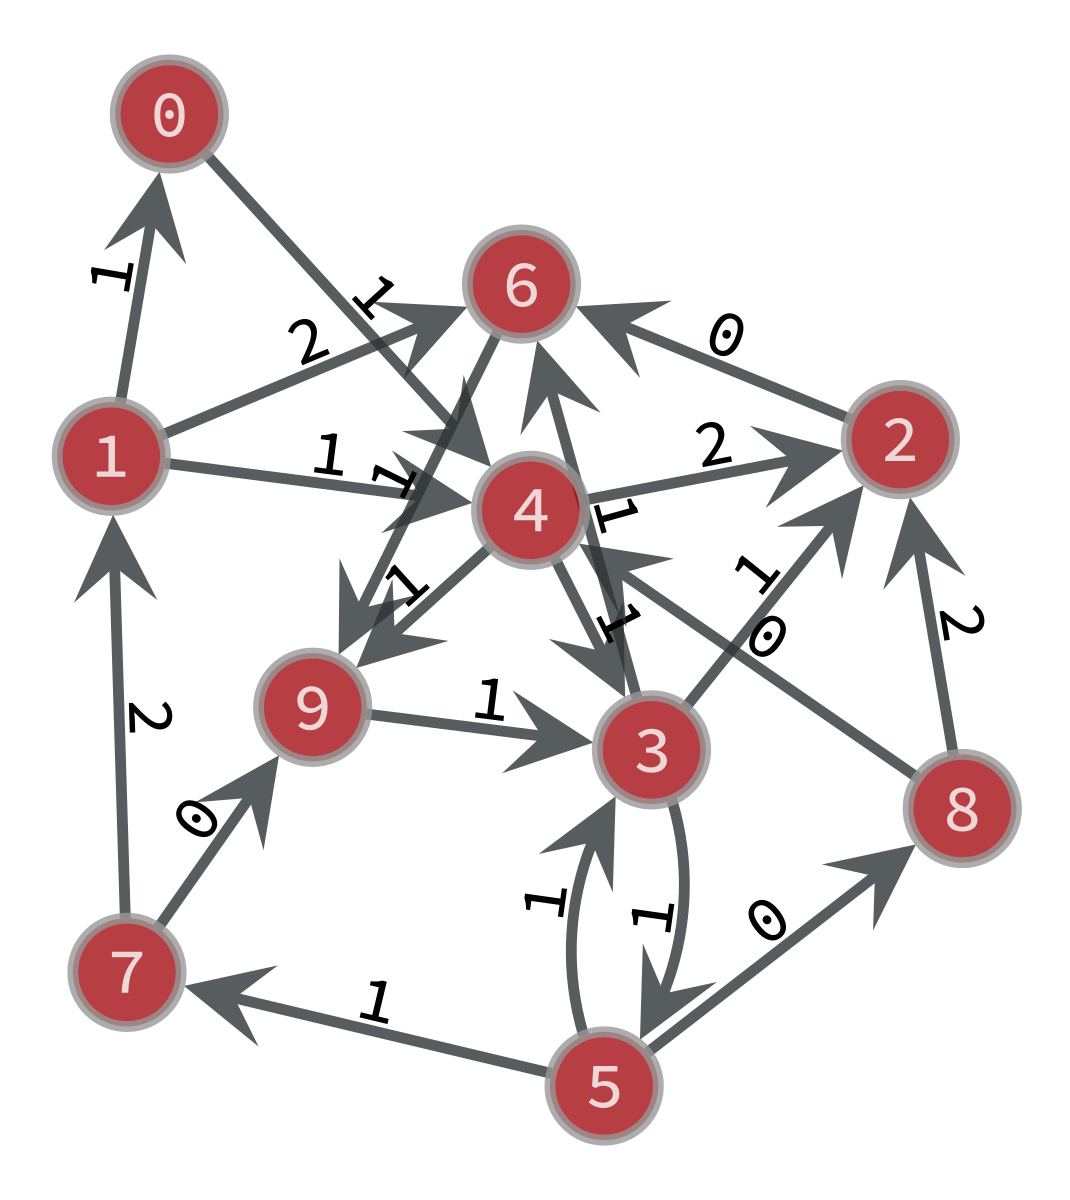

In [155]:
maxNodeDegree = 4 #Due to design decisions of the team of Graph-Tool, we are forced to declare the Max Node degree outside 
                  #of the generator in order to be used with the sample_k function. 
generatedGraph = graphGenerator(10)

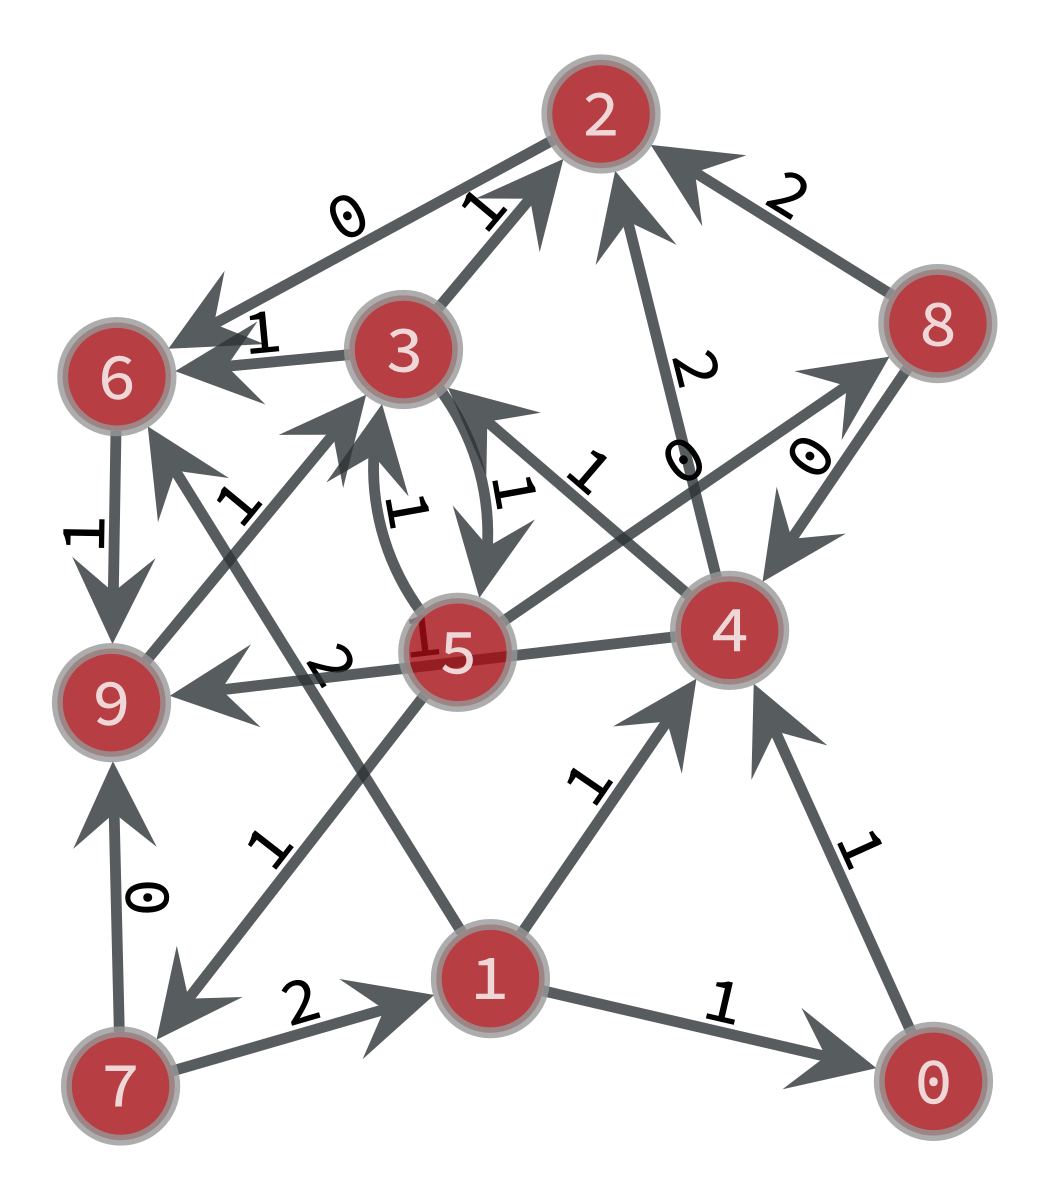

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f86c82716a0, at 0x7f86c8c2d640>

In [156]:
g = gt.Graph(generatedGraph)
gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight)

In [157]:
g.save("generatedGraph.xml.gz")

In [145]:
#gt.seed_rng(14)

#np.random.seed(14)

g = gt.random_graph(7, sample_k)

print(g)
print(g.num_edges())
edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight

<Graph object, directed, with 7 vertices and 15 edges, at 0x7f86c3f49400>
15


In [127]:
#LA PRUEBA DE FUEGO
for i in range(1000):
    g = gt.random_graph(7, sample_k)
    print(g)
    print(g.num_edges())
    edge_weight = g.new_edge_property("double")
    g.edge_properties["weight"] = edge_weight
    for edge in g.edges():
    #print(edge)
        g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
    #print(g.ep.weight[edge])

    cap = g.new_vertex_property("int")
    g.vertex_properties["cap"] = cap 

    for vertex in g.vertices():
        g.vp.cap[vertex] = int(vertex)
    for c in gt.all_circuits(g):
        print(c)
        pathSum = 0
        for item in range(len(c)-1):
            pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
            print(pathSum)
        #Final edge sum: (edge(initial node of the cycle,last node before initial node))
        pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
        if(pathSum == 0):
            print("Cycle with Zero weight detected!")
        else:
            print("Path SUM: %s" % (pathSum))

<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc3fb1f0>
10
[0 1 2 3]
1.0
1.0
1.0
Path SUM: 2.0
[3 4]
0.0
Cycle with Zero weight detected!
[5 6]
0.0
Path SUM: 1.0
<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc414f40>
10
[0 5]
2.0
Path SUM: 2.0
[0 3 6 4 5]
2.0
2.0
4.0
6.0
Path SUM: 6.0
[1 2]
2.0
Path SUM: 4.0
[4 5]
2.0
Path SUM: 2.0
<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc307370>
10
[0 3 1 2 6]
0.0
2.0
2.0
4.0
Path SUM: 6.0
[1 2 6]
0.0
2.0
Path SUM: 4.0
[3 5 4]
2.0
4.0
Path SUM: 5.0
[4 5]
0.0
Path SUM: 2.0
<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc3eeac0>
10
[0 5]
1.0
Path SUM: 3.0
[0 5 2 1]
1.0
1.0
1.0
Path SUM: 2.0
[3 6]
1.0
Path SUM: 3.0
<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc310700>
10
[0 1 5 4]
1.0
1.0
1.0
Path SUM: 2.0
[1 5]
0.0
Cycle with Zero weight detected!
[2 6]
0.0
Cycle with Zero weight detected!
[3 6]
1.0
Path SUM: 1.0
<Graph object, directed, with 7 vertices a

In [122]:
for edge in g.edges():
    #print(edge)
    g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
    #print(g.ep.weight[edge])

cap = g.new_vertex_property("int")
g.vertex_properties["cap"] = cap 

for vertex in g.vertices():
    g.vp.cap[vertex] = int(vertex)

In [123]:
for c in gt.all_circuits(g):
    print(c)
    pathSum = 0
    for item in range(len(c)-1):
        pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
        print(pathSum)
    #Final edge sum: (edge(initial node of the cycle,last node before initial node))
    pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
    if(pathSum == 0):
        print("Cycle with Zero weight detected!")
    else:
        print("Path SUM: %s" % (pathSum))

[0 5 2]
0.0
2.0
Path SUM: 3.0
[0 5 4 2]
0.0
0.0
2.0
Path SUM: 3.0
[0 6 4 2]
1.0
3.0
5.0
Path SUM: 6.0
[1 6 4 3]
0.0
2.0
4.0
Path SUM: 6.0


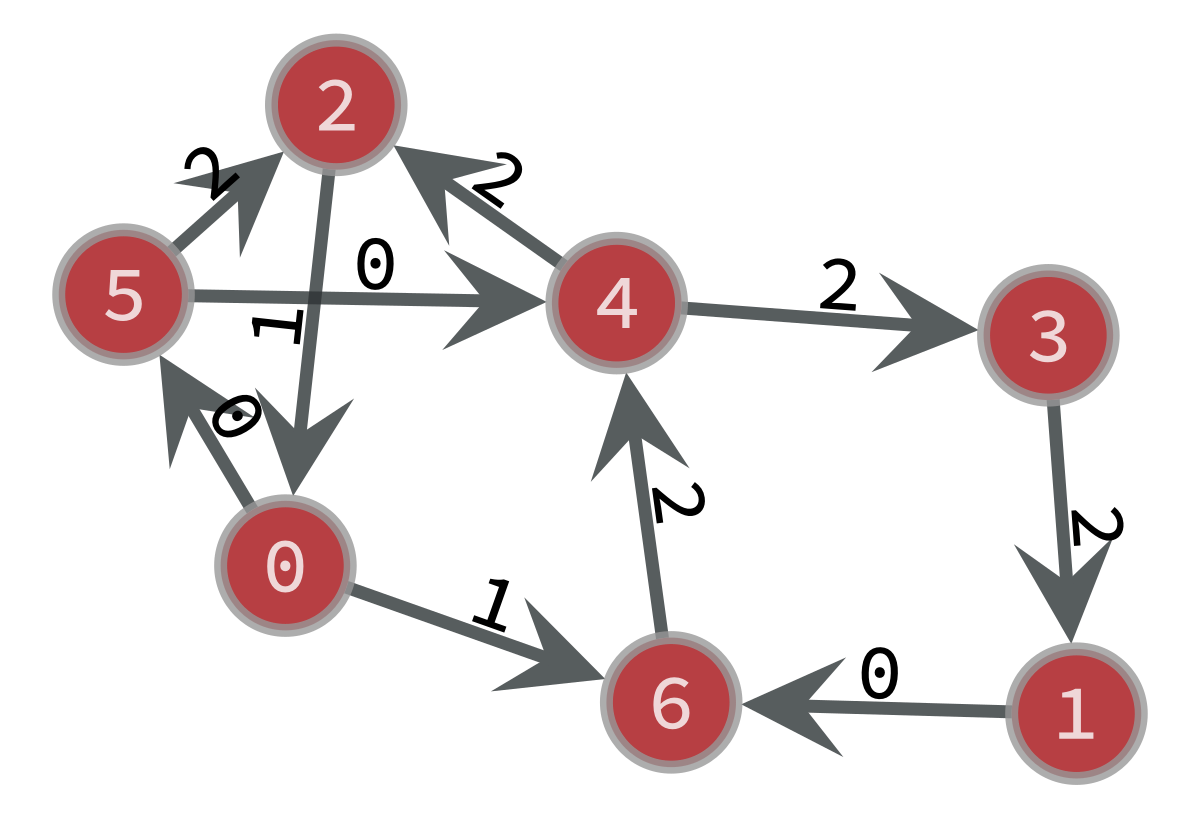

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f86cc3ee4c0, at 0x7f86cc3fb070>

In [124]:
gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight)

In [98]:
#Save a Graph
g.save("my_graph2.xml.gz")